CF mask shape: (384, 384)
Number of attention points: 60151
X range: 0 to 383
Y range: 0 to 383
Attention values range: 0.2000571638345718 to 1.0


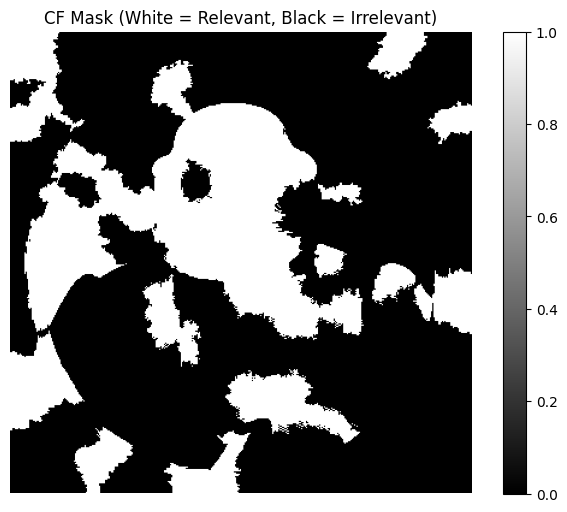

Points added to attention map: 60151
Sum of attention map: 16119.958989828825


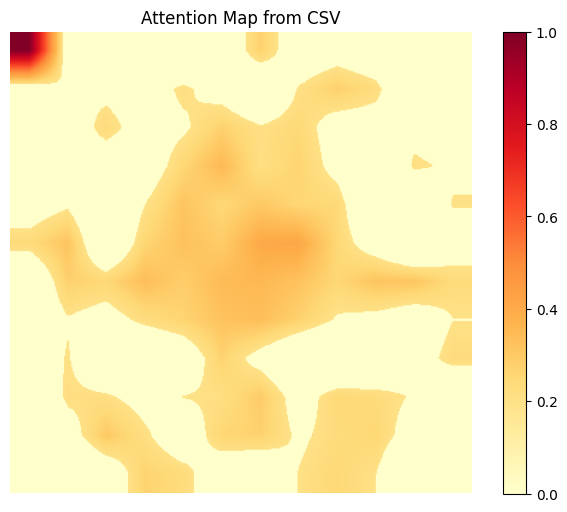

Overlap score: 52.21 %


In [ ]:
import numpy as np 
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

counterfactual_img = Image.open("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/PortraitResultsForCF/correct_classification_exp&newimg/Aubry, Peter II/ReasonForOriginalClassification_A_221.jpg.png")
counterfactual = np.array(counterfactual_img)
cf_mask = np.any(counterfactual>0,axis=-1).astype(float)

attention_values = pd.read_csv("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/HeatmapOriginal/HeatmapPortrait/Class_Aubry__Peter_II_Coordinates/AllAttentionCoordinates_Aubry__Peter_II.csv")
attention_values = attention_values[attention_values['attention_value']>=0.2]
attention_values = attention_values[attention_values['true_class']==attention_values['predicted_class']]
attention_values = attention_values[attention_values['image_name']=="/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/PortraitResultsForCF/correct_classification_exp&newimg/Aubry, Peter II/ReasonForOriginalClassification_A_221.jpg.png".split("/")[-1].split(".")[0].split("Classification")[1].lstrip("_")]

print("CF mask shape:", cf_mask.shape)
print("Number of attention points:", len(attention_values))

# Debug: Check coordinate ranges
if len(attention_values) > 0:
    print("X range:", attention_values['x'].min(), "to", attention_values['x'].max())
    print("Y range:", attention_values['y'].min(), "to", attention_values['y'].max())
    print("Attention values range:", attention_values['attention_value'].min(), "to", attention_values['attention_value'].max())
else:
    print("No attention data after filtering!")


# Create 2D attention map from your CSV coordinates
attention_map = np.zeros(cf_mask.shape)
points_added = 0

for _, row in attention_values.iterrows():
    x = int(row['x'])
    y = int(row['y'])
    attention_val = row['attention_value']
    
    if 0 <= y < attention_map.shape[0] and 0 <= x < attention_map.shape[1]:
        attention_map[y, x] = attention_val
        points_added += 1

print(f"Points added to attention map: {points_added}")
print(f"Sum of attention map: {np.sum(attention_map)}")

# Visualize attention map
plt.figure(figsize=(8, 6))
plt.imshow(attention_map, cmap='YlOrRd')
plt.title('Attention Map from CSV')
plt.colorbar()
plt.axis('off')
plt.show()

# Calculate overlap (with zero division check)
total_attention = np.sum(attention_map)
if total_attention > 0:
    overlap_score = (np.sum(attention_map * cf_mask) / total_attention)*100
    print("Overlap score:", round(overlap_score,2),"%")
    overlap_region = attention_map * cf_mask
    im3 = axes[1,0].imshow(overlap_region, cmap='plasma', interpolation='bilinear')
    axes[1,0].set_title(f'Overlap Region\nScore: {overlap_score:.2f}%', fontsize=14, fontweight='bold')
    axes[1,0].axis('off')
else:
    print("No attention values in the attention map - check coordinate ranges!")

Overlap score: 52.21%


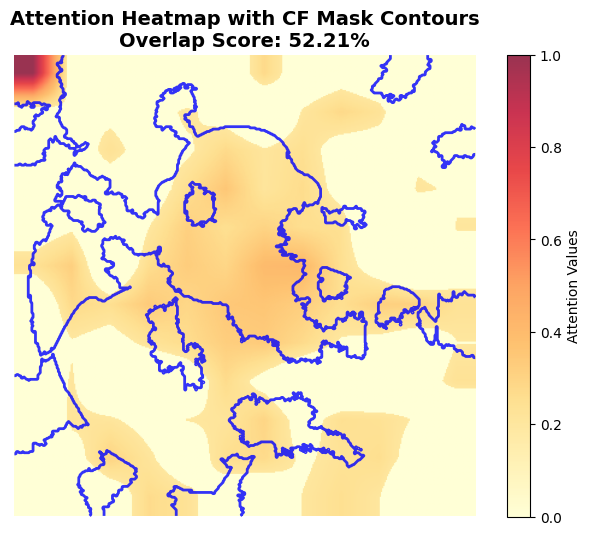

In [8]:
import numpy as np 
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for loading data
counterfactual_img = Image.open("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/PortraitResultsForCF/correct_classification_exp&newimg/Aubry, Peter II/ReasonForOriginalClassification_A_221.jpg.png")
counterfactual = np.array(counterfactual_img)
cf_mask = np.any(counterfactual>0,axis=-1).astype(float)

attention_values = pd.read_csv("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/HeatmapOriginal/HeatmapPortrait/Class_Aubry__Peter_II_Coordinates/AllAttentionCoordinates_Aubry__Peter_II.csv")
attention_values = attention_values[attention_values['attention_value']>=0.2]
attention_values = attention_values[attention_values['true_class']==attention_values['predicted_class']]
attention_values = attention_values[attention_values['image_name']=="/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/PortraitResultsForCF/correct_classification_exp&newimg/Aubry, Peter II/ReasonForOriginalClassification_A_221.jpg.png".split("/")[-1].split(".")[0].split("Classification")[1].lstrip("_")]

# Create attention map
attention_map = np.zeros(cf_mask.shape)
points_added = 0

for _, row in attention_values.iterrows():
    x = int(row['x'])
    y = int(row['y'])
    attention_val = row['attention_value']
    
    if 0 <= y < attention_map.shape[0] and 0 <= x < attention_map.shape[1]:
        attention_map[y, x] = attention_val
        points_added += 1

# Calculate overlap score
total_attention = np.sum(attention_map)
if total_attention > 0:
    overlap_score = (np.sum(attention_map * cf_mask) / total_attention) * 100
else:
    overlap_score = 0

print(f"Overlap score: {overlap_score:.2f}%")

# =================== METHOD 4: CONTOUR OVERLAY ===================
plt.figure(figsize=(8, 6))

# Show attention map as heatmap
im = plt.imshow(attention_map, cmap='YlOrRd', alpha=0.8)

# Add CF mask as contour lines
if np.max(cf_mask) > 0:
    plt.contour(cf_mask, levels=[0.5], colors='blue', linewidths=2, alpha=0.8)
    
plt.title(f'Attention Heatmap with CF Mask Contours\nOverlap Score: {overlap_score:.2f}%', fontsize=14, fontweight='bold')
plt.colorbar(im, label='Attention Values') 
plt.axis('off')
plt.show()

Overlap score: 52.21%


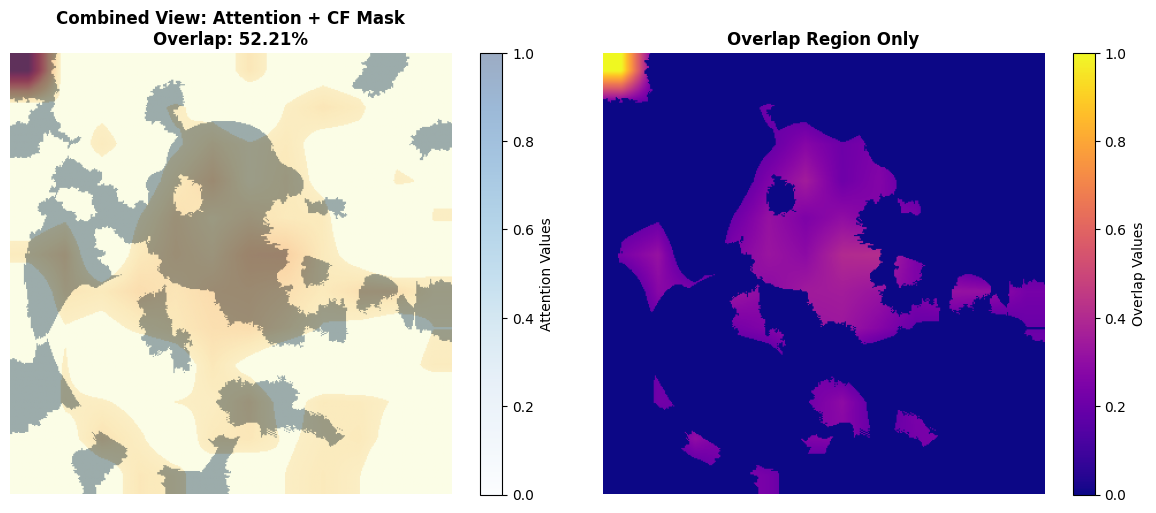

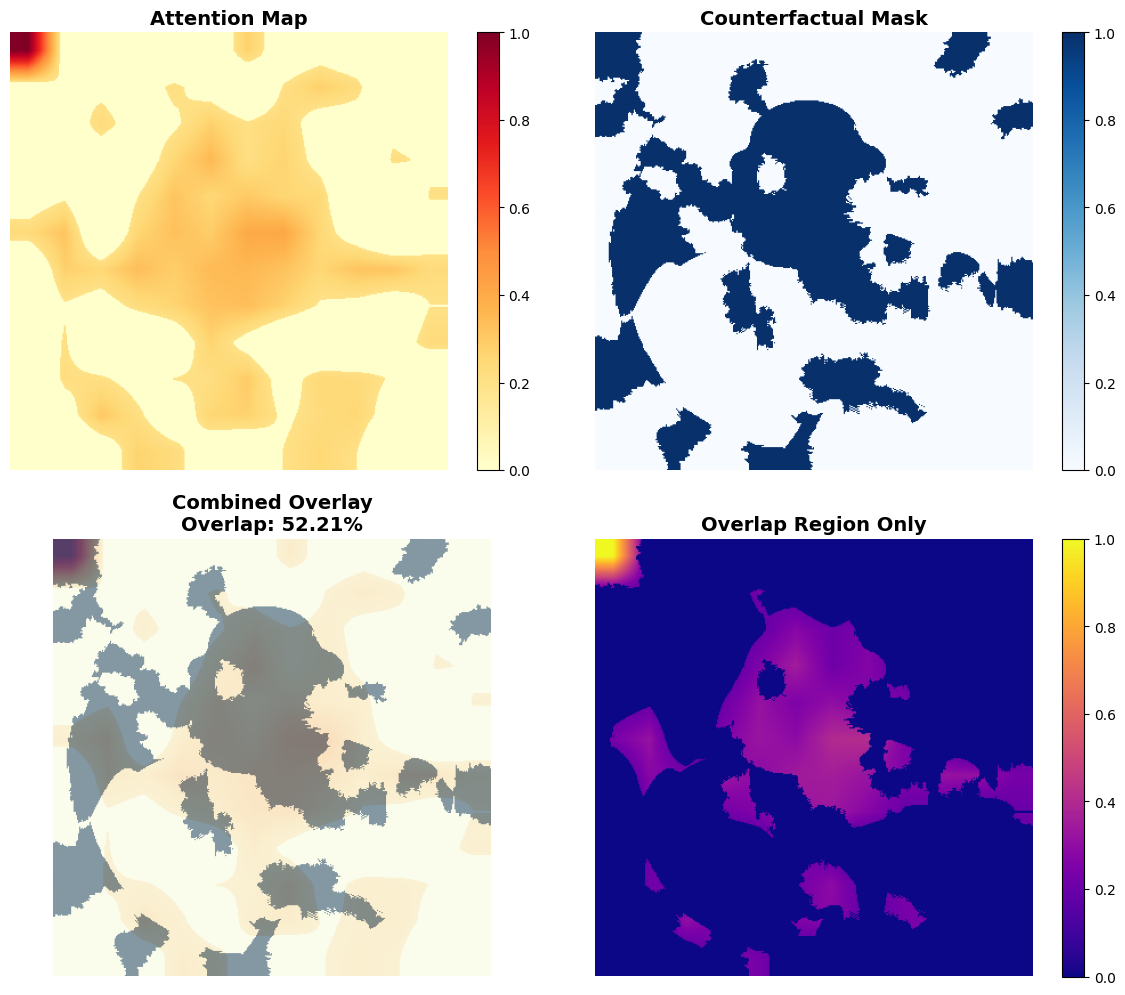

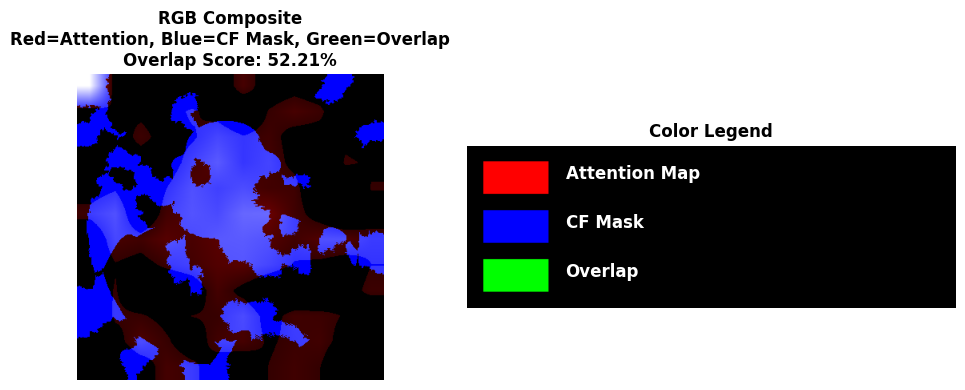

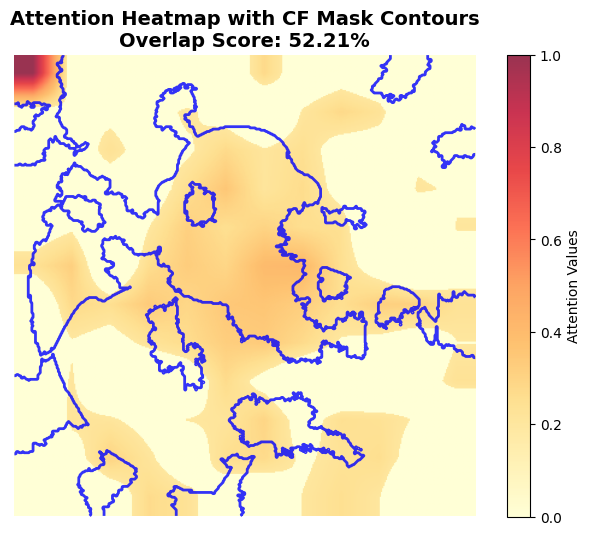


SUMMARY STATISTICS
CF mask shape: (384, 384)
Number of attention points: 60151
Points added to attention map: 60151
Sum of attention map: 16119.9590
Sum of CF mask: 45804.0000
Overlap score: 52.21%
Non-zero attention pixels: 60151
Non-zero CF mask pixels: 45804
Overlapping pixels: 28851


In [1]:
import numpy as np 
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for loading data
counterfactual_img = Image.open("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/PortraitResultsForCF/correct_classification_exp&newimg/Aubry, Peter II/ReasonForOriginalClassification_A_221.jpg.png")
counterfactual = np.array(counterfactual_img)
cf_mask = np.any(counterfactual>0,axis=-1).astype(float)

attention_values = pd.read_csv("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/HeatmapOriginal/HeatmapPortrait/Class_Aubry__Peter_II_Coordinates/AllAttentionCoordinates_Aubry__Peter_II.csv")
attention_values = attention_values[attention_values['attention_value']>=0.2]
attention_values = attention_values[attention_values['true_class']==attention_values['predicted_class']]
attention_values = attention_values[attention_values['image_name']=="/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/PortraitResultsForCF/correct_classification_exp&newimg/Aubry, Peter II/ReasonForOriginalClassification_A_221.jpg.png".split("/")[-1].split(".")[0].split("Classification")[1].lstrip("_")]

# Create attention map
attention_map = np.zeros(cf_mask.shape)
points_added = 0

for _, row in attention_values.iterrows():
    x = int(row['x'])
    y = int(row['y'])
    attention_val = row['attention_value']
    
    if 0 <= y < attention_map.shape[0] and 0 <= x < attention_map.shape[1]:
        attention_map[y, x] = attention_val
        points_added += 1

# Calculate overlap score
total_attention = np.sum(attention_map)
if total_attention > 0:
    overlap_score = (np.sum(attention_map * cf_mask) / total_attention) * 100
else:
    overlap_score = 0

print(f"Overlap score: {overlap_score:.2f}%")

# =================== METHOD 1: OVERLAY WITH TRANSPARENCY ===================
plt.figure(figsize=(12, 5))

# Single combined plot
plt.subplot(1, 2, 1)
# Show attention map as base
plt.imshow(attention_map, cmap='YlOrRd', alpha=0.8)
# Overlay CF mask with transparency
plt.imshow(cf_mask, cmap='Blues', alpha=0.4)
plt.title(f'Combined View: Attention + CF Mask\nOverlap: {overlap_score:.2f}%', fontsize=12, fontweight='bold')
plt.colorbar(label='Attention Values')
plt.axis('off')

# Show just the overlap region
plt.subplot(1, 2, 2)
overlap_region = attention_map * cf_mask
plt.imshow(overlap_region, cmap='plasma')
plt.title('Overlap Region Only', fontsize=12, fontweight='bold')
plt.colorbar(label='Overlap Values')
plt.axis('off')
plt.tight_layout()
plt.show()

# =================== METHOD 2: SIDE-BY-SIDE COMPARISON ===================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original attention map
im1 = axes[0,0].imshow(attention_map, cmap='YlOrRd')
axes[0,0].set_title('Attention Map', fontsize=14, fontweight='bold')
axes[0,0].axis('off')
plt.colorbar(im1, ax=axes[0,0])

# CF mask
im2 = axes[0,1].imshow(cf_mask, cmap='Blues')
axes[0,1].set_title('Counterfactual Mask', fontsize=14, fontweight='bold')
axes[0,1].axis('off')
plt.colorbar(im2, ax=axes[0,1])

# Combined overlay
axes[1,0].imshow(attention_map, cmap='YlOrRd', alpha=0.7)
axes[1,0].imshow(cf_mask, cmap='Blues', alpha=0.5)
axes[1,0].set_title(f'Combined Overlay\nOverlap: {overlap_score:.2f}%', fontsize=14, fontweight='bold')
axes[1,0].axis('off')

# Overlap region
overlap_region = attention_map * cf_mask
im4 = axes[1,1].imshow(overlap_region, cmap='plasma')
axes[1,1].set_title('Overlap Region Only', fontsize=14, fontweight='bold')
axes[1,1].axis('off')
plt.colorbar(im4, ax=axes[1,1])

plt.tight_layout()
plt.show()

# =================== METHOD 3: RGB COMPOSITE ===================
plt.figure(figsize=(10, 4))

# Create RGB composite where:
# Red channel = Attention map
# Blue channel = CF mask
# Green channel = Overlap
rgb_composite = np.zeros((*cf_mask.shape, 3))
rgb_composite[:,:,0] = attention_map / np.max(attention_map) if np.max(attention_map) > 0 else 0  # Red for attention
rgb_composite[:,:,2] = cf_mask  # Blue for CF mask
rgb_composite[:,:,1] = (attention_map * cf_mask) / np.max(attention_map * cf_mask) if np.max(attention_map * cf_mask) > 0 else 0  # Green for overlap

plt.subplot(1, 2, 1)
plt.imshow(rgb_composite)
plt.title(f'RGB Composite\nRed=Attention, Blue=CF Mask, Green=Overlap\nOverlap Score: {overlap_score:.2f}%', fontsize=12, fontweight='bold')
plt.axis('off')

# Legend/explanation
plt.subplot(1, 2, 2)
legend_img = np.zeros((100, 300, 3))
legend_img[10:30, 10:50, 0] = 1  # Red square
legend_img[40:60, 10:50, 2] = 1  # Blue square  
legend_img[70:90, 10:50, 1] = 1  # Green square
plt.imshow(legend_img)
plt.text(60, 20, 'Attention Map', fontsize=12, color='white', fontweight='bold')
plt.text(60, 50, 'CF Mask', fontsize=12, color='white', fontweight='bold')
plt.text(60, 80, 'Overlap', fontsize=12, color='white', fontweight='bold')
plt.title('Color Legend', fontsize=12, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# =================== METHOD 4: CONTOUR OVERLAY ===================
plt.figure(figsize=(8, 6))

# Show attention map as heatmap - store the image object
im = plt.imshow(attention_map, cmap='YlOrRd', alpha=0.8)

# Add CF mask as contour lines
if np.max(cf_mask) > 0:
    plt.contour(cf_mask, levels=[0.5], colors='blue', linewidths=2, alpha=0.8)
    
plt.title(f'Attention Heatmap with CF Mask Contours\nOverlap Score: {overlap_score:.2f}%', fontsize=14, fontweight='bold')
plt.colorbar(im, label='Attention Values')  # Pass the image object to colorbar
plt.axis('off')
plt.show()

# =================== PRINT SUMMARY STATISTICS ===================
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"CF mask shape: {cf_mask.shape}")
print(f"Number of attention points: {len(attention_values)}")
print(f"Points added to attention map: {points_added}")
print(f"Sum of attention map: {np.sum(attention_map):.4f}")
print(f"Sum of CF mask: {np.sum(cf_mask):.4f}")
print(f"Overlap score: {overlap_score:.2f}%")
print(f"Non-zero attention pixels: {np.count_nonzero(attention_map)}")
print(f"Non-zero CF mask pixels: {np.count_nonzero(cf_mask)}")
print(f"Overlapping pixels: {np.count_nonzero(attention_map * cf_mask)}")